# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

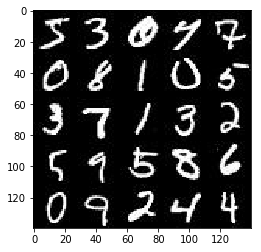

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

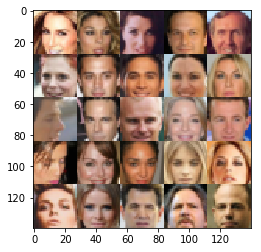

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, keep_prob=0.7):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
#     # TODO: Implement Function
#     # For reusability
#     kinit = tf.random_normal_initializer(stddev=0.02)
#     with tf.variable_scope('discriminator', reuse=reuse):
#         # 28x28x1 
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x1 = tf.contrib.layers.conv2d(images, 64, 5, stride=2, padding= 'same')
# #         x1 = tf.nn.dropout(x1, keep_prob=keep_prob)
#         relu1 = tf.maximum(0.2 * x1, x1)
#         relu1 = tf.nn.dropout(relu1, keep_prob=keep_prob)
#         # 14x14x64
#         # applied  xavier initializer
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x2 = tf.contrib.layers.conv2d(x1, 128, 5, stride=2, padding= 'same')
#         bn2 = tf.layers.batch_normalization(x2, training=True)
# #         bn2 = tf.nn.dropout(bn2, keep_prob=keep_prob)
#         relu2 = tf.maximum(bn2 * 0.2, bn2)
#         relu2 = tf.nn.dropout(relu2, keep_prob=keep_prob)
#         # 7x7x128
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x3 = tf.contrib.layers.conv2d(x2, 265, 5, stride=2, padding= 'same')
#         bn3 = tf.layers.batch_normalization(x3, training=True)
# #         bn3 = tf.nn.dropout(bn3, keep_prob=keep_prob)
#         relu3 = tf.maximum(bn3 * 0.2, bn3)
#         relu3 = tf.nn.dropout(relu3, keep_prob=keep_prob)
#         # 4x4x256
#         flat = tf.reshape(relu3, (-1, 4*4*256))
#         logits = tf.layers.dense(flat, 1)
#         out = tf.sigmoid(logits)
        
#         return out, logits

    # TODO: Implement Function
    # For reusability
    with tf.variable_scope('discriminator', reuse=reuse):
        # 28x28x1 
        x1 = tf.contrib.layers.conv2d(images, 64, 5, stride=2, padding= 'same')
        relu1 = tf.maximum(0.2 * x1, x1)
        relu1 = tf.nn.dropout(relu1, keep_prob=keep_prob)
        # 14x14x64
        x2 = tf.contrib.layers.conv2d(relu1, 128, 5, stride=2, padding= 'same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(bn2 * 0.2, bn2)
        relu2 = tf.nn.dropout(relu2, keep_prob=keep_prob)
        # 7x7x128
        x3 = tf.contrib.layers.conv2d(relu2, 256, 5, stride=2, padding= 'same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(bn3 * 0.2, bn3)
        relu3 = tf.nn.dropout(relu3, keep_prob=keep_prob)
        # 4x4x256
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, keep_prob=0.7):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # For reusability
    reuse = not is_train
    num_dims = 512
    kinit = tf.random_normal_initializer(stddev=0.02)
    with tf.variable_scope('generator', reuse= reuse):
        # Fully connected layer
        x1 = tf.layers.dense(z, 4*4*num_dims)
        # Reshape
        x1 = tf.reshape(x1, (-1, 4, 4, num_dims))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(x1 * 0.2, x1)
#         x1 = tf.nn.dropout(x1, keep_prob)
        # 4x4x512
        
        
        # 4 x 4
        # 7 = 4 * s
        #out_height = ceil(float(in_height) / float(strides[1]))
        #out_width = ceil(float(in_width) / float(strides[2]))
        
        #out_height = ceil(float(in_height * float(strides[1]) + filter_height - 1 / float(strides[1]))  = (7 * 2 + 5 - 1) = 18
        #out_width  = ceil(float(in_width * float(strides[2]) + filter_width - 1 / float(strides[2])))    = (7 * 2 + 5 - 1) = 18
        
        # Convolution 1
        x2 = tf.layers.conv2d_transpose(x1, num_dims/2, 4, strides=1, padding='valid', kernel_initializer=kinit)
#         x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
#         x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
#         x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        # 7x7s256
        

        
        # Convolution 2
        x3 = tf.layers.conv2d_transpose(x2, num_dims/4, 5, strides=2, padding= 'same', kernel_initializer=kinit)
#         x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
#         x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        # 14x14x128
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding= 'same')
        # 28x28xout_channel_dim
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # applied smoothing
    smooth = 0
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=(tf.ones_like(d_model_real) * (1 - smooth))))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))) 
    
    g_loss =  tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    
    return d_loss_real + d_loss_fake, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    # Optimization
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
class MY_GAN:
    def __init__(self, real_size, z_size, learning_rate, beta1= 0.5):
#         tf.reset_default_graph()
        print(real_size[1])
        print(real_size[2])
        print(real_size[3])
        self.input_real, self.input_z, self.learning_rate = model_inputs(real_size[1],
                                                     real_size[2],
                                                     real_size[3],
                                                     z_size)
        self.d_loss, self.g_loss = model_loss(self.input_real,
                                              self.input_z,
                                              real_size[3])
        self.d_opt, self.g_opt = model_opt(self.d_loss,
                                           self.g_loss,
                                           learning_rate,
                                           beta1)
        
losses = []

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # Main vars
#     saver = tf.train.Saver()
#     sample_z = np.random.uniform(-1, 1, size=(72, z_size))

#     losses = []
    steps = 0
    global losses
    losses = []
    print(data_shape)
    my_net = MY_GAN(data_shape, z_dim, learning_rate, beta1 = beta1)
    
    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                #rescale batch images to -1, 1
                batch_images = batch_images * 2
                # TODO: Train Model
                steps += 1
                
                # Make random noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # optimizer
                _ = sess.run(my_net.d_opt, feed_dict = {my_net.input_real: batch_images, my_net.input_z: batch_z})
                _ = sess.run(my_net.g_opt, feed_dict={my_net.input_z: batch_z, my_net.input_real: batch_images})
#                 _ = sess.run(my_net.g_opt, feed_dict={my_net.input_z: batch_z, my_net.input_real: batch_images})
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = my_net.d_loss.eval({my_net.input_z: batch_z, my_net.input_real: batch_images})
                    train_loss_g = my_net.g_loss.eval({my_net.input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    generator_sample = show_generator_output(sess,
                                                             n_images = 30,
                                                             input_z = my_net.input_z,
                                                             out_channel_dim = data_shape[3],
                                                             image_mode = data_image_mode)
#                     gen_samples = sess.run(
#                                    generator(my_net.input_z, 3, is_train=False),
#                                    feed_dict={my_net.input_z: sample_z})
# #                     _ = view_samples(-1, samples, 6, 12, figsize=figsize)
#                     plt.show()
        
#         saver.save(sess, './checkpoints/generator.ckpt')
#     with open('samples.pkl', 'wb') as f:
#         pkl.dump(samples, f)

                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
28
28
1
Epoch 1/2... Discriminator Loss: 2.6517... Generator Loss: 9.5833
Epoch 1/2... Discriminator Loss: 1.8615... Generator Loss: 4.4309
Epoch 1/2... Discriminator Loss: 0.8751... Generator Loss: 4.4970
Epoch 1/2... Discriminator Loss: 0.6592... Generator Loss: 2.7842
Epoch 1/2... Discriminator Loss: 3.1882... Generator Loss: 0.3242
Epoch 1/2... Discriminator Loss: 0.9829... Generator Loss: 2.8037
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 2.0140
Epoch 1/2... Discriminator Loss: 1.4223... Generator Loss: 1.0224
Epoch 1/2... Discriminator Loss: 1.7451... Generator Loss: 1.6364
Epoch 1/2... Discriminator Loss: 1.4255... Generator Loss: 1.0377


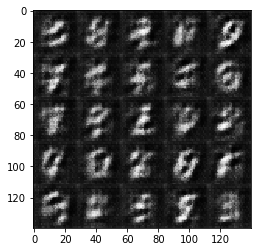

Epoch 1/2... Discriminator Loss: 1.3012... Generator Loss: 3.5712
Epoch 1/2... Discriminator Loss: 1.8337... Generator Loss: 0.4267
Epoch 1/2... Discriminator Loss: 1.0312... Generator Loss: 1.6029
Epoch 1/2... Discriminator Loss: 1.7155... Generator Loss: 0.6373
Epoch 1/2... Discriminator Loss: 0.7525... Generator Loss: 2.3230
Epoch 1/2... Discriminator Loss: 0.9094... Generator Loss: 2.8389
Epoch 1/2... Discriminator Loss: 1.2632... Generator Loss: 0.8184
Epoch 1/2... Discriminator Loss: 0.9806... Generator Loss: 0.9505
Epoch 1/2... Discriminator Loss: 0.6883... Generator Loss: 1.7857
Epoch 1/2... Discriminator Loss: 2.0916... Generator Loss: 0.4363


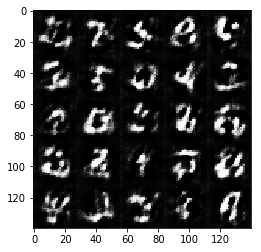

Epoch 1/2... Discriminator Loss: 0.7713... Generator Loss: 1.8949
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.8856
Epoch 1/2... Discriminator Loss: 1.1077... Generator Loss: 1.1757
Epoch 1/2... Discriminator Loss: 0.8250... Generator Loss: 1.7429
Epoch 1/2... Discriminator Loss: 0.6513... Generator Loss: 1.7081
Epoch 1/2... Discriminator Loss: 0.4100... Generator Loss: 2.0590
Epoch 1/2... Discriminator Loss: 0.6065... Generator Loss: 1.8598
Epoch 1/2... Discriminator Loss: 1.0170... Generator Loss: 1.2871
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 2.6583
Epoch 1/2... Discriminator Loss: 1.6360... Generator Loss: 0.3971


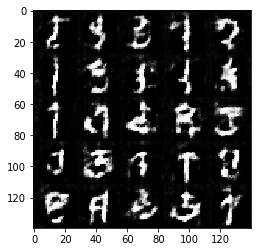

Epoch 1/2... Discriminator Loss: 0.5553... Generator Loss: 1.4421
Epoch 1/2... Discriminator Loss: 1.6676... Generator Loss: 0.5349
Epoch 1/2... Discriminator Loss: 2.3526... Generator Loss: 0.2728
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 1.0694
Epoch 1/2... Discriminator Loss: 1.0384... Generator Loss: 1.2431
Epoch 1/2... Discriminator Loss: 1.0693... Generator Loss: 0.9029
Epoch 1/2... Discriminator Loss: 1.0246... Generator Loss: 1.9423
Epoch 1/2... Discriminator Loss: 1.4411... Generator Loss: 0.6937
Epoch 1/2... Discriminator Loss: 0.8570... Generator Loss: 1.2044
Epoch 1/2... Discriminator Loss: 1.8451... Generator Loss: 0.4078


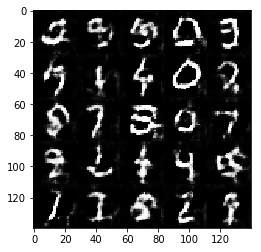

Epoch 1/2... Discriminator Loss: 2.2136... Generator Loss: 0.2179
Epoch 1/2... Discriminator Loss: 0.6525... Generator Loss: 1.1887
Epoch 1/2... Discriminator Loss: 0.6999... Generator Loss: 1.7056
Epoch 1/2... Discriminator Loss: 1.2659... Generator Loss: 0.8299
Epoch 1/2... Discriminator Loss: 0.8690... Generator Loss: 1.0216
Epoch 1/2... Discriminator Loss: 0.8251... Generator Loss: 1.4517
Epoch 1/2... Discriminator Loss: 0.7780... Generator Loss: 1.3758
Epoch 1/2... Discriminator Loss: 1.4438... Generator Loss: 0.7761
Epoch 1/2... Discriminator Loss: 1.4529... Generator Loss: 0.7480
Epoch 1/2... Discriminator Loss: 0.6392... Generator Loss: 1.2822


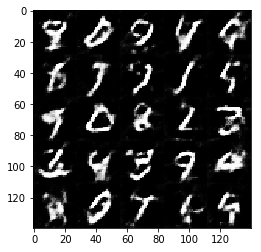

Epoch 1/2... Discriminator Loss: 1.1209... Generator Loss: 0.8620
Epoch 1/2... Discriminator Loss: 1.0276... Generator Loss: 0.9322
Epoch 1/2... Discriminator Loss: 1.5063... Generator Loss: 0.5251
Epoch 1/2... Discriminator Loss: 1.5419... Generator Loss: 0.7010
Epoch 1/2... Discriminator Loss: 1.0576... Generator Loss: 0.8010
Epoch 1/2... Discriminator Loss: 1.3746... Generator Loss: 1.2625
Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 0.8747
Epoch 1/2... Discriminator Loss: 1.9942... Generator Loss: 0.4952
Epoch 1/2... Discriminator Loss: 0.9484... Generator Loss: 1.2814
Epoch 1/2... Discriminator Loss: 1.1156... Generator Loss: 1.5648


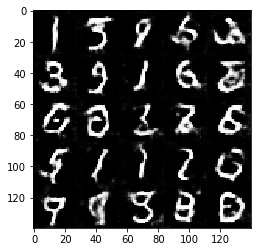

Epoch 1/2... Discriminator Loss: 0.9090... Generator Loss: 1.3795
Epoch 1/2... Discriminator Loss: 1.4492... Generator Loss: 0.5376
Epoch 1/2... Discriminator Loss: 0.5928... Generator Loss: 1.7467
Epoch 1/2... Discriminator Loss: 0.5878... Generator Loss: 1.7752
Epoch 1/2... Discriminator Loss: 1.5148... Generator Loss: 0.7324
Epoch 1/2... Discriminator Loss: 0.5418... Generator Loss: 1.6476
Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.0674... Generator Loss: 0.7396
Epoch 1/2... Discriminator Loss: 1.0616... Generator Loss: 0.8682
Epoch 1/2... Discriminator Loss: 1.3563... Generator Loss: 0.7739


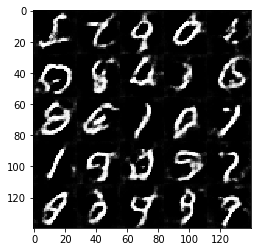

Epoch 1/2... Discriminator Loss: 1.2018... Generator Loss: 0.8097
Epoch 1/2... Discriminator Loss: 0.7125... Generator Loss: 1.4477
Epoch 1/2... Discriminator Loss: 0.9721... Generator Loss: 1.1030
Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 0.7578
Epoch 1/2... Discriminator Loss: 1.0599... Generator Loss: 1.8532
Epoch 1/2... Discriminator Loss: 0.7404... Generator Loss: 1.0067
Epoch 1/2... Discriminator Loss: 1.7149... Generator Loss: 0.7453
Epoch 1/2... Discriminator Loss: 1.4153... Generator Loss: 1.3431
Epoch 1/2... Discriminator Loss: 1.0048... Generator Loss: 1.0413
Epoch 1/2... Discriminator Loss: 1.9508... Generator Loss: 0.4610


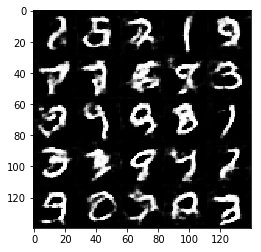

Epoch 1/2... Discriminator Loss: 0.8810... Generator Loss: 1.6292
Epoch 1/2... Discriminator Loss: 1.9490... Generator Loss: 0.5465
Epoch 1/2... Discriminator Loss: 1.3939... Generator Loss: 0.3742
Epoch 1/2... Discriminator Loss: 0.8012... Generator Loss: 1.6149
Epoch 1/2... Discriminator Loss: 0.7808... Generator Loss: 1.7581
Epoch 1/2... Discriminator Loss: 0.9320... Generator Loss: 0.9714
Epoch 1/2... Discriminator Loss: 1.8092... Generator Loss: 0.4622
Epoch 1/2... Discriminator Loss: 2.4418... Generator Loss: 0.1941
Epoch 1/2... Discriminator Loss: 1.6265... Generator Loss: 0.4295
Epoch 1/2... Discriminator Loss: 0.7983... Generator Loss: 1.4741


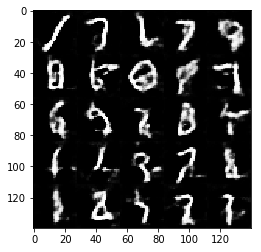

Epoch 1/2... Discriminator Loss: 0.8076... Generator Loss: 2.0483
Epoch 1/2... Discriminator Loss: 0.6954... Generator Loss: 1.7754
Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 1.4738
Epoch 1/2... Discriminator Loss: 1.5370... Generator Loss: 0.7871
Epoch 1/2... Discriminator Loss: 0.6183... Generator Loss: 1.9876
Epoch 1/2... Discriminator Loss: 0.7255... Generator Loss: 1.0972
Epoch 1/2... Discriminator Loss: 1.1071... Generator Loss: 1.1748
Epoch 1/2... Discriminator Loss: 1.0246... Generator Loss: 1.3096
Epoch 1/2... Discriminator Loss: 0.6847... Generator Loss: 1.1928
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 0.7496


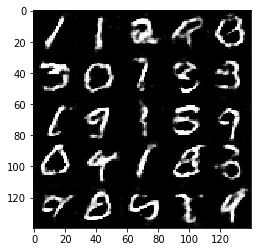

Epoch 1/2... Discriminator Loss: 1.1711... Generator Loss: 0.7756
Epoch 1/2... Discriminator Loss: 1.8772... Generator Loss: 0.3419
Epoch 1/2... Discriminator Loss: 1.8694... Generator Loss: 0.5454
Epoch 1/2... Discriminator Loss: 0.7288... Generator Loss: 1.4648
Epoch 1/2... Discriminator Loss: 0.5075... Generator Loss: 1.3143
Epoch 1/2... Discriminator Loss: 1.6240... Generator Loss: 0.4481
Epoch 1/2... Discriminator Loss: 0.8661... Generator Loss: 0.4857
Epoch 1/2... Discriminator Loss: 1.2437... Generator Loss: 0.9394
Epoch 1/2... Discriminator Loss: 1.6837... Generator Loss: 0.2532
Epoch 1/2... Discriminator Loss: 1.2971... Generator Loss: 0.5825


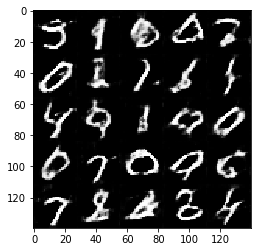

Epoch 1/2... Discriminator Loss: 0.7846... Generator Loss: 1.4293
Epoch 1/2... Discriminator Loss: 1.3308... Generator Loss: 0.7630
Epoch 1/2... Discriminator Loss: 0.7696... Generator Loss: 0.8350
Epoch 1/2... Discriminator Loss: 0.9785... Generator Loss: 2.0049
Epoch 1/2... Discriminator Loss: 1.1545... Generator Loss: 0.3528
Epoch 1/2... Discriminator Loss: 1.3150... Generator Loss: 1.3657
Epoch 1/2... Discriminator Loss: 1.3783... Generator Loss: 3.6317
Epoch 1/2... Discriminator Loss: 1.3473... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 1.0540... Generator Loss: 0.6304
Epoch 1/2... Discriminator Loss: 0.8847... Generator Loss: 2.5444


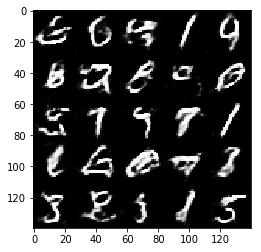

Epoch 1/2... Discriminator Loss: 0.5495... Generator Loss: 1.3509
Epoch 1/2... Discriminator Loss: 0.9701... Generator Loss: 0.9832
Epoch 1/2... Discriminator Loss: 1.1398... Generator Loss: 0.4404
Epoch 1/2... Discriminator Loss: 0.9668... Generator Loss: 0.9291
Epoch 1/2... Discriminator Loss: 0.8876... Generator Loss: 1.7126
Epoch 1/2... Discriminator Loss: 0.9449... Generator Loss: 1.9988
Epoch 1/2... Discriminator Loss: 1.0795... Generator Loss: 1.5065
Epoch 1/2... Discriminator Loss: 0.9222... Generator Loss: 0.8867
Epoch 1/2... Discriminator Loss: 0.7041... Generator Loss: 1.7507
Epoch 1/2... Discriminator Loss: 1.4598... Generator Loss: 0.8083


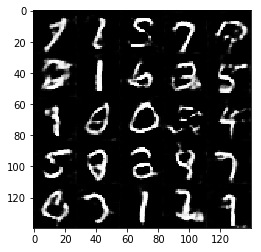

Epoch 1/2... Discriminator Loss: 0.3298... Generator Loss: 3.4134
Epoch 1/2... Discriminator Loss: 1.3116... Generator Loss: 1.3725
Epoch 1/2... Discriminator Loss: 1.1760... Generator Loss: 1.5163
Epoch 1/2... Discriminator Loss: 1.0285... Generator Loss: 1.6110
Epoch 1/2... Discriminator Loss: 1.3975... Generator Loss: 0.6611
Epoch 1/2... Discriminator Loss: 2.0136... Generator Loss: 1.0005
Epoch 1/2... Discriminator Loss: 0.9594... Generator Loss: 0.9137
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 1.1416
Epoch 1/2... Discriminator Loss: 1.6587... Generator Loss: 0.5837
Epoch 1/2... Discriminator Loss: 1.2733... Generator Loss: 0.5081


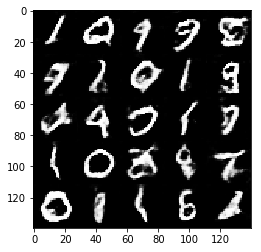

Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 1.8794
Epoch 1/2... Discriminator Loss: 0.9806... Generator Loss: 1.0723
Epoch 1/2... Discriminator Loss: 0.9542... Generator Loss: 0.8880
Epoch 1/2... Discriminator Loss: 0.9705... Generator Loss: 0.9022
Epoch 1/2... Discriminator Loss: 1.5249... Generator Loss: 0.4910
Epoch 1/2... Discriminator Loss: 1.2742... Generator Loss: 0.7587
Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 0.8901
Epoch 1/2... Discriminator Loss: 1.5022... Generator Loss: 0.7541
Epoch 1/2... Discriminator Loss: 1.4859... Generator Loss: 0.4500
Epoch 1/2... Discriminator Loss: 0.8693... Generator Loss: 1.5055


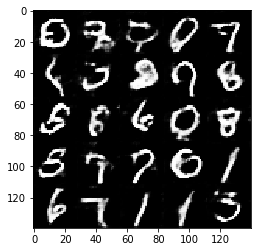

Epoch 1/2... Discriminator Loss: 1.8663... Generator Loss: 0.7835
Epoch 1/2... Discriminator Loss: 1.1709... Generator Loss: 1.0501
Epoch 1/2... Discriminator Loss: 0.7092... Generator Loss: 1.3499
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 0.8846
Epoch 1/2... Discriminator Loss: 1.5917... Generator Loss: 0.9343
Epoch 1/2... Discriminator Loss: 2.1241... Generator Loss: 0.5793
Epoch 1/2... Discriminator Loss: 1.0429... Generator Loss: 0.8105
Epoch 1/2... Discriminator Loss: 1.4257... Generator Loss: 1.1905
Epoch 1/2... Discriminator Loss: 1.3634... Generator Loss: 1.2578
Epoch 1/2... Discriminator Loss: 0.7162... Generator Loss: 1.9820


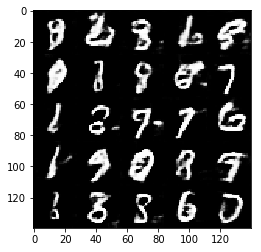

Epoch 1/2... Discriminator Loss: 0.7578... Generator Loss: 1.4024
Epoch 1/2... Discriminator Loss: 1.5633... Generator Loss: 1.1944
Epoch 1/2... Discriminator Loss: 0.7028... Generator Loss: 1.8987
Epoch 1/2... Discriminator Loss: 1.2537... Generator Loss: 1.0974
Epoch 1/2... Discriminator Loss: 0.3151... Generator Loss: 1.7942
Epoch 1/2... Discriminator Loss: 0.4895... Generator Loss: 1.7799
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 0.6760
Epoch 1/2... Discriminator Loss: 0.9091... Generator Loss: 1.5875
Epoch 1/2... Discriminator Loss: 1.2217... Generator Loss: 0.9052
Epoch 1/2... Discriminator Loss: 0.6145... Generator Loss: 1.5355


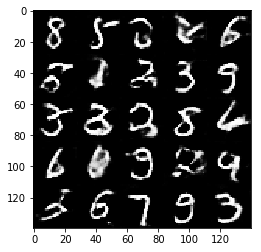

Epoch 1/2... Discriminator Loss: 0.7757... Generator Loss: 2.3068
Epoch 1/2... Discriminator Loss: 0.2760... Generator Loss: 3.0228
Epoch 1/2... Discriminator Loss: 1.2000... Generator Loss: 0.6003
Epoch 1/2... Discriminator Loss: 1.8995... Generator Loss: 0.6415
Epoch 1/2... Discriminator Loss: 0.8236... Generator Loss: 1.2688
Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 0.6987
Epoch 1/2... Discriminator Loss: 1.5999... Generator Loss: 0.4141
Epoch 1/2... Discriminator Loss: 0.6144... Generator Loss: 0.8819
Epoch 1/2... Discriminator Loss: 0.6553... Generator Loss: 1.5774
Epoch 1/2... Discriminator Loss: 0.4682... Generator Loss: 1.9938


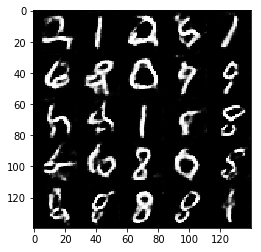

Epoch 1/2... Discriminator Loss: 1.2648... Generator Loss: 1.0630
Epoch 1/2... Discriminator Loss: 1.7361... Generator Loss: 0.8795
Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.8097
Epoch 1/2... Discriminator Loss: 1.4758... Generator Loss: 0.7162
Epoch 1/2... Discriminator Loss: 0.6251... Generator Loss: 0.9086
Epoch 1/2... Discriminator Loss: 2.7757... Generator Loss: 0.2016
Epoch 1/2... Discriminator Loss: 0.5173... Generator Loss: 2.4875
Epoch 2/2... Discriminator Loss: 0.8054... Generator Loss: 1.2154
Epoch 2/2... Discriminator Loss: 0.6868... Generator Loss: 1.3043
Epoch 2/2... Discriminator Loss: 0.4470... Generator Loss: 2.1971


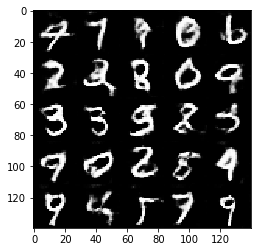

Epoch 2/2... Discriminator Loss: 1.4261... Generator Loss: 0.9994
Epoch 2/2... Discriminator Loss: 1.7134... Generator Loss: 0.6208
Epoch 2/2... Discriminator Loss: 1.0593... Generator Loss: 1.0547
Epoch 2/2... Discriminator Loss: 0.7886... Generator Loss: 1.2714
Epoch 2/2... Discriminator Loss: 0.3942... Generator Loss: 3.0638
Epoch 2/2... Discriminator Loss: 0.4983... Generator Loss: 2.4903
Epoch 2/2... Discriminator Loss: 2.1788... Generator Loss: 0.6077
Epoch 2/2... Discriminator Loss: 1.0799... Generator Loss: 0.4541
Epoch 2/2... Discriminator Loss: 0.4559... Generator Loss: 2.0269
Epoch 2/2... Discriminator Loss: 0.8512... Generator Loss: 0.9988


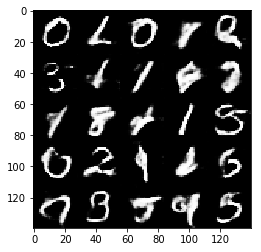

Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 1.4705
Epoch 2/2... Discriminator Loss: 1.1472... Generator Loss: 0.8076
Epoch 2/2... Discriminator Loss: 1.3036... Generator Loss: 1.4256
Epoch 2/2... Discriminator Loss: 0.4975... Generator Loss: 2.3301
Epoch 2/2... Discriminator Loss: 0.8899... Generator Loss: 1.5111
Epoch 2/2... Discriminator Loss: 0.9786... Generator Loss: 1.4573
Epoch 2/2... Discriminator Loss: 1.3958... Generator Loss: 1.0405
Epoch 2/2... Discriminator Loss: 1.4157... Generator Loss: 0.6190
Epoch 2/2... Discriminator Loss: 1.0421... Generator Loss: 0.6227
Epoch 2/2... Discriminator Loss: 2.1073... Generator Loss: 0.3636


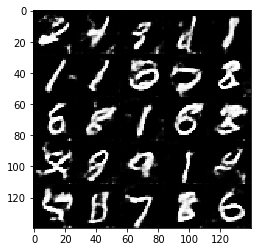

Epoch 2/2... Discriminator Loss: 0.9481... Generator Loss: 0.8673
Epoch 2/2... Discriminator Loss: 1.2467... Generator Loss: 1.8076
Epoch 2/2... Discriminator Loss: 0.9483... Generator Loss: 1.4202
Epoch 2/2... Discriminator Loss: 0.5145... Generator Loss: 1.7545
Epoch 2/2... Discriminator Loss: 1.0875... Generator Loss: 1.1852
Epoch 2/2... Discriminator Loss: 1.2124... Generator Loss: 0.8419
Epoch 2/2... Discriminator Loss: 0.5715... Generator Loss: 2.5178
Epoch 2/2... Discriminator Loss: 0.6050... Generator Loss: 2.0420
Epoch 2/2... Discriminator Loss: 0.7676... Generator Loss: 1.0099
Epoch 2/2... Discriminator Loss: 0.6138... Generator Loss: 1.3756


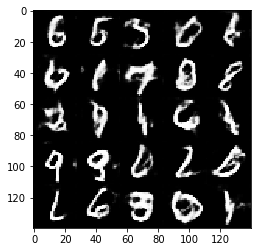

Epoch 2/2... Discriminator Loss: 0.5226... Generator Loss: 2.7998
Epoch 2/2... Discriminator Loss: 0.7644... Generator Loss: 5.8413
Epoch 2/2... Discriminator Loss: 1.5983... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 0.5905... Generator Loss: 2.2076
Epoch 2/2... Discriminator Loss: 0.8351... Generator Loss: 1.9284
Epoch 2/2... Discriminator Loss: 0.8648... Generator Loss: 1.3992
Epoch 2/2... Discriminator Loss: 1.6260... Generator Loss: 0.5448
Epoch 2/2... Discriminator Loss: 0.2733... Generator Loss: 3.3457
Epoch 2/2... Discriminator Loss: 0.6197... Generator Loss: 1.7885
Epoch 2/2... Discriminator Loss: 0.9607... Generator Loss: 0.8701


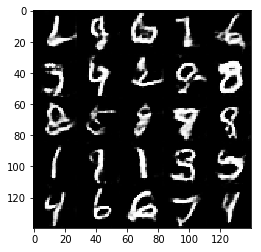

Epoch 2/2... Discriminator Loss: 2.1590... Generator Loss: 0.3926
Epoch 2/2... Discriminator Loss: 1.4554... Generator Loss: 0.5119
Epoch 2/2... Discriminator Loss: 0.5743... Generator Loss: 2.4983
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 1.4873
Epoch 2/2... Discriminator Loss: 0.4476... Generator Loss: 2.2455
Epoch 2/2... Discriminator Loss: 0.9557... Generator Loss: 0.9985
Epoch 2/2... Discriminator Loss: 0.5059... Generator Loss: 3.4468
Epoch 2/2... Discriminator Loss: 2.1106... Generator Loss: 0.3184
Epoch 2/2... Discriminator Loss: 0.8169... Generator Loss: 0.6805
Epoch 2/2... Discriminator Loss: 0.4750... Generator Loss: 1.6028


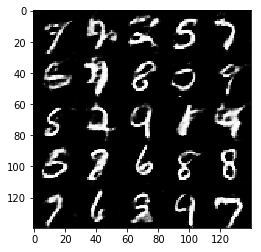

Epoch 2/2... Discriminator Loss: 1.6310... Generator Loss: 0.8201
Epoch 2/2... Discriminator Loss: 1.4046... Generator Loss: 0.7527
Epoch 2/2... Discriminator Loss: 0.7455... Generator Loss: 1.4260
Epoch 2/2... Discriminator Loss: 1.4254... Generator Loss: 1.0110
Epoch 2/2... Discriminator Loss: 0.4342... Generator Loss: 1.7650
Epoch 2/2... Discriminator Loss: 1.6887... Generator Loss: 1.5386
Epoch 2/2... Discriminator Loss: 0.9258... Generator Loss: 1.3535
Epoch 2/2... Discriminator Loss: 0.4768... Generator Loss: 1.8388
Epoch 2/2... Discriminator Loss: 0.6997... Generator Loss: 2.4941
Epoch 2/2... Discriminator Loss: 0.4269... Generator Loss: 2.2446


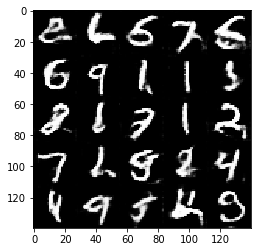

Epoch 2/2... Discriminator Loss: 0.4388... Generator Loss: 2.0696
Epoch 2/2... Discriminator Loss: 0.9217... Generator Loss: 1.2094
Epoch 2/2... Discriminator Loss: 0.5931... Generator Loss: 1.0402
Epoch 2/2... Discriminator Loss: 0.4342... Generator Loss: 2.3798
Epoch 2/2... Discriminator Loss: 1.5748... Generator Loss: 0.2887
Epoch 2/2... Discriminator Loss: 0.7424... Generator Loss: 1.2889
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 0.9412
Epoch 2/2... Discriminator Loss: 0.8367... Generator Loss: 1.6965
Epoch 2/2... Discriminator Loss: 1.1914... Generator Loss: 0.6476
Epoch 2/2... Discriminator Loss: 0.4392... Generator Loss: 4.5010


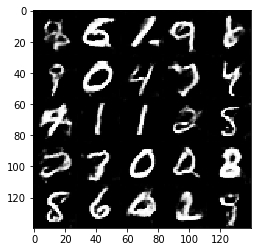

Epoch 2/2... Discriminator Loss: 1.0805... Generator Loss: 1.2439
Epoch 2/2... Discriminator Loss: 0.5316... Generator Loss: 1.6303
Epoch 2/2... Discriminator Loss: 0.9065... Generator Loss: 2.0228
Epoch 2/2... Discriminator Loss: 0.7407... Generator Loss: 1.4379
Epoch 2/2... Discriminator Loss: 1.4174... Generator Loss: 0.5715
Epoch 2/2... Discriminator Loss: 0.2887... Generator Loss: 1.5839
Epoch 2/2... Discriminator Loss: 1.0843... Generator Loss: 0.9249
Epoch 2/2... Discriminator Loss: 1.4375... Generator Loss: 0.8339
Epoch 2/2... Discriminator Loss: 0.8209... Generator Loss: 1.3770
Epoch 2/2... Discriminator Loss: 2.0722... Generator Loss: 0.4834


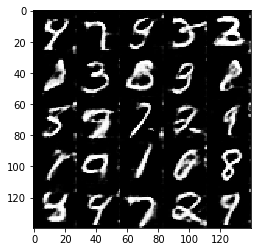

Epoch 2/2... Discriminator Loss: 1.0515... Generator Loss: 0.7019
Epoch 2/2... Discriminator Loss: 1.3074... Generator Loss: 0.4511
Epoch 2/2... Discriminator Loss: 2.4429... Generator Loss: 0.2969
Epoch 2/2... Discriminator Loss: 1.3595... Generator Loss: 0.9083
Epoch 2/2... Discriminator Loss: 0.6702... Generator Loss: 1.2406
Epoch 2/2... Discriminator Loss: 0.4823... Generator Loss: 4.2829
Epoch 2/2... Discriminator Loss: 0.7480... Generator Loss: 1.6530
Epoch 2/2... Discriminator Loss: 0.8062... Generator Loss: 2.2896
Epoch 2/2... Discriminator Loss: 0.5197... Generator Loss: 0.9315
Epoch 2/2... Discriminator Loss: 1.7928... Generator Loss: 0.4495


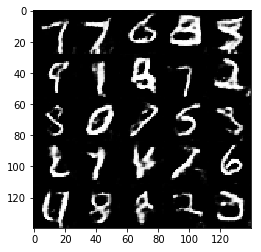

Epoch 2/2... Discriminator Loss: 1.1618... Generator Loss: 4.1921
Epoch 2/2... Discriminator Loss: 0.7539... Generator Loss: 0.8323
Epoch 2/2... Discriminator Loss: 3.4633... Generator Loss: 0.4470
Epoch 2/2... Discriminator Loss: 0.8226... Generator Loss: 1.8993
Epoch 2/2... Discriminator Loss: 2.5678... Generator Loss: 0.6747
Epoch 2/2... Discriminator Loss: 0.4312... Generator Loss: 2.5654
Epoch 2/2... Discriminator Loss: 1.9090... Generator Loss: 0.3997
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.2848
Epoch 2/2... Discriminator Loss: 0.7613... Generator Loss: 2.0169
Epoch 2/2... Discriminator Loss: 0.6208... Generator Loss: 1.1741


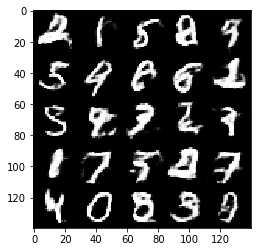

Epoch 2/2... Discriminator Loss: 0.7794... Generator Loss: 0.8651
Epoch 2/2... Discriminator Loss: 1.4605... Generator Loss: 0.6691
Epoch 2/2... Discriminator Loss: 0.6550... Generator Loss: 1.4356
Epoch 2/2... Discriminator Loss: 1.2620... Generator Loss: 0.9251
Epoch 2/2... Discriminator Loss: 0.7224... Generator Loss: 1.3631
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 2.8133
Epoch 2/2... Discriminator Loss: 0.5654... Generator Loss: 1.6293
Epoch 2/2... Discriminator Loss: 0.2256... Generator Loss: 2.3319
Epoch 2/2... Discriminator Loss: 1.0095... Generator Loss: 5.7652
Epoch 2/2... Discriminator Loss: 0.9363... Generator Loss: 1.2015


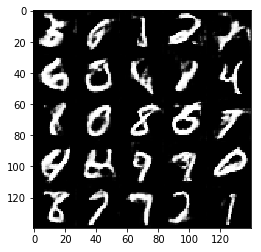

Epoch 2/2... Discriminator Loss: 1.1818... Generator Loss: 1.1108
Epoch 2/2... Discriminator Loss: 0.5493... Generator Loss: 1.1651
Epoch 2/2... Discriminator Loss: 0.8785... Generator Loss: 1.3733
Epoch 2/2... Discriminator Loss: 0.7883... Generator Loss: 2.3454
Epoch 2/2... Discriminator Loss: 0.9160... Generator Loss: 0.8255
Epoch 2/2... Discriminator Loss: 0.9052... Generator Loss: 1.6019
Epoch 2/2... Discriminator Loss: 0.3366... Generator Loss: 2.4413
Epoch 2/2... Discriminator Loss: 0.7192... Generator Loss: 1.1057
Epoch 2/2... Discriminator Loss: 1.1637... Generator Loss: 0.5698
Epoch 2/2... Discriminator Loss: 1.4826... Generator Loss: 0.8793


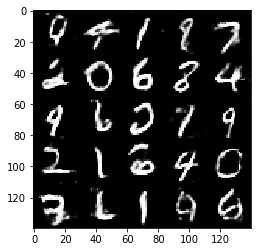

Epoch 2/2... Discriminator Loss: 0.1040... Generator Loss: 3.2544
Epoch 2/2... Discriminator Loss: 2.9443... Generator Loss: 7.2327
Epoch 2/2... Discriminator Loss: 2.8976... Generator Loss: 0.2221
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 2.9793
Epoch 2/2... Discriminator Loss: 1.2803... Generator Loss: 0.8271
Epoch 2/2... Discriminator Loss: 0.5682... Generator Loss: 2.3136
Epoch 2/2... Discriminator Loss: 0.3757... Generator Loss: 1.2152
Epoch 2/2... Discriminator Loss: 2.5697... Generator Loss: 0.5944
Epoch 2/2... Discriminator Loss: 2.4468... Generator Loss: 0.2182
Epoch 2/2... Discriminator Loss: 0.7335... Generator Loss: 1.5741


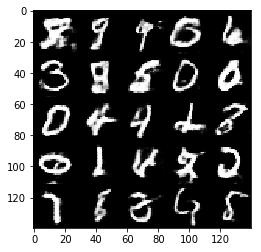

Epoch 2/2... Discriminator Loss: 0.6810... Generator Loss: 2.7703
Epoch 2/2... Discriminator Loss: 1.1204... Generator Loss: 1.3092
Epoch 2/2... Discriminator Loss: 1.2862... Generator Loss: 0.4274
Epoch 2/2... Discriminator Loss: 2.9212... Generator Loss: 0.2870
Epoch 2/2... Discriminator Loss: 0.6446... Generator Loss: 0.8370
Epoch 2/2... Discriminator Loss: 0.5600... Generator Loss: 2.2548
Epoch 2/2... Discriminator Loss: 1.5644... Generator Loss: 0.6216
Epoch 2/2... Discriminator Loss: 0.7412... Generator Loss: 1.1817
Epoch 2/2... Discriminator Loss: 0.7186... Generator Loss: 1.5532
Epoch 2/2... Discriminator Loss: 1.2996... Generator Loss: 1.1915


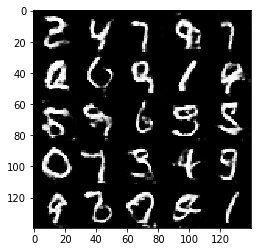

Epoch 2/2... Discriminator Loss: 0.5707... Generator Loss: 1.7474
Epoch 2/2... Discriminator Loss: 0.6148... Generator Loss: 1.4732
Epoch 2/2... Discriminator Loss: 0.6174... Generator Loss: 2.0785
Epoch 2/2... Discriminator Loss: 1.0088... Generator Loss: 1.5123
Epoch 2/2... Discriminator Loss: 1.5674... Generator Loss: 0.6974
Epoch 2/2... Discriminator Loss: 0.7371... Generator Loss: 1.0353
Epoch 2/2... Discriminator Loss: 0.4440... Generator Loss: 2.2222
Epoch 2/2... Discriminator Loss: 0.5950... Generator Loss: 2.9300
Epoch 2/2... Discriminator Loss: 0.6087... Generator Loss: 1.6680
Epoch 2/2... Discriminator Loss: 0.5927... Generator Loss: 1.6982


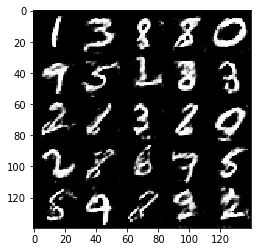

Epoch 2/2... Discriminator Loss: 2.5206... Generator Loss: 0.5193
Epoch 2/2... Discriminator Loss: 0.5130... Generator Loss: 3.0833
Epoch 2/2... Discriminator Loss: 1.1395... Generator Loss: 1.7797
Epoch 2/2... Discriminator Loss: 1.9042... Generator Loss: 1.1878
Epoch 2/2... Discriminator Loss: 1.4606... Generator Loss: 1.0008
Epoch 2/2... Discriminator Loss: 0.9002... Generator Loss: 2.7423
Epoch 2/2... Discriminator Loss: 0.7830... Generator Loss: 1.0475
Epoch 2/2... Discriminator Loss: 0.2664... Generator Loss: 2.2237
Epoch 2/2... Discriminator Loss: 1.6080... Generator Loss: 4.1150
Epoch 2/2... Discriminator Loss: 1.0879... Generator Loss: 0.9177


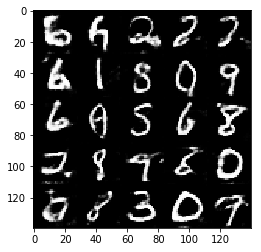

Epoch 2/2... Discriminator Loss: 1.1653... Generator Loss: 0.8263
Epoch 2/2... Discriminator Loss: 0.3098... Generator Loss: 1.8012
Epoch 2/2... Discriminator Loss: 0.7810... Generator Loss: 1.6564
Epoch 2/2... Discriminator Loss: 0.4157... Generator Loss: 2.9092
Epoch 2/2... Discriminator Loss: 0.5101... Generator Loss: 1.3159
Epoch 2/2... Discriminator Loss: 0.6752... Generator Loss: 2.1659
Epoch 2/2... Discriminator Loss: 0.3626... Generator Loss: 2.3200
Epoch 2/2... Discriminator Loss: 0.5868... Generator Loss: 1.9897
Epoch 2/2... Discriminator Loss: 4.6911... Generator Loss: 0.1599
Epoch 2/2... Discriminator Loss: 0.2846... Generator Loss: 1.8789


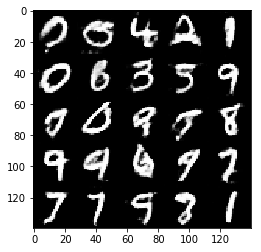

Epoch 2/2... Discriminator Loss: 0.6653... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 2.3872... Generator Loss: 0.4011
Epoch 2/2... Discriminator Loss: 0.6566... Generator Loss: 1.8977
Epoch 2/2... Discriminator Loss: 0.6515... Generator Loss: 1.0925
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 1.2297
Epoch 2/2... Discriminator Loss: 1.5826... Generator Loss: 1.2316
Epoch 2/2... Discriminator Loss: 0.6335... Generator Loss: 1.6367
Epoch 2/2... Discriminator Loss: 0.5326... Generator Loss: 3.2559
Epoch 2/2... Discriminator Loss: 0.5082... Generator Loss: 2.8732
Epoch 2/2... Discriminator Loss: 1.8982... Generator Loss: 0.3752


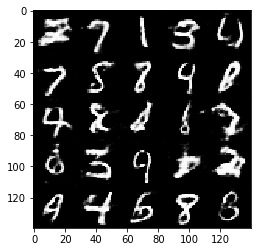

Epoch 2/2... Discriminator Loss: 0.5155... Generator Loss: 1.7073
Epoch 2/2... Discriminator Loss: 1.7608... Generator Loss: 0.1095
Epoch 2/2... Discriminator Loss: 0.5387... Generator Loss: 2.2130
Epoch 2/2... Discriminator Loss: 1.1090... Generator Loss: 0.8603
Epoch 2/2... Discriminator Loss: 0.1899... Generator Loss: 3.1474


In [18]:
batch_size = 32 #32
z_dim = 200 #150
learning_rate = 0.0005
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

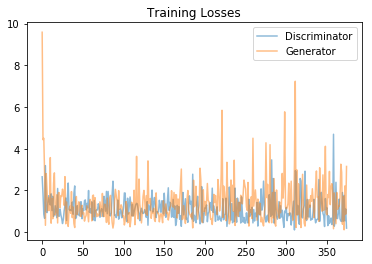

In [19]:
plt = pyplot
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
28
28
3
Epoch 1/1... Discriminator Loss: 0.3569... Generator Loss: 4.9960
Epoch 1/1... Discriminator Loss: 2.8693... Generator Loss: 13.6255
Epoch 1/1... Discriminator Loss: 0.2527... Generator Loss: 7.1281
Epoch 1/1... Discriminator Loss: 0.4984... Generator Loss: 6.6831
Epoch 1/1... Discriminator Loss: 2.5220... Generator Loss: 16.1227
Epoch 1/1... Discriminator Loss: 0.2664... Generator Loss: 3.1712
Epoch 1/1... Discriminator Loss: 0.1731... Generator Loss: 8.2126
Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.8841
Epoch 1/1... Discriminator Loss: 0.5355... Generator Loss: 8.7099
Epoch 1/1... Discriminator Loss: 0.0733... Generator Loss: 10.6392


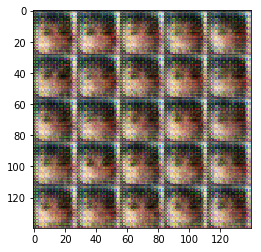

Epoch 1/1... Discriminator Loss: 0.1034... Generator Loss: 9.8600
Epoch 1/1... Discriminator Loss: 0.1223... Generator Loss: 5.1229
Epoch 1/1... Discriminator Loss: 0.1485... Generator Loss: 6.3120
Epoch 1/1... Discriminator Loss: 0.0519... Generator Loss: 5.8888
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 1.2688
Epoch 1/1... Discriminator Loss: 0.1776... Generator Loss: 4.9265
Epoch 1/1... Discriminator Loss: 0.1355... Generator Loss: 5.9430
Epoch 1/1... Discriminator Loss: 0.2432... Generator Loss: 2.9030
Epoch 1/1... Discriminator Loss: 0.6570... Generator Loss: 6.9186
Epoch 1/1... Discriminator Loss: 0.7579... Generator Loss: 1.3682


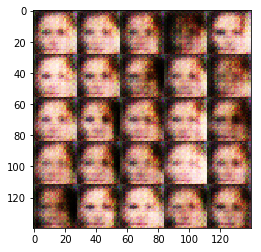

Epoch 1/1... Discriminator Loss: 0.4457... Generator Loss: 1.6738
Epoch 1/1... Discriminator Loss: 0.2241... Generator Loss: 2.3803
Epoch 1/1... Discriminator Loss: 0.2785... Generator Loss: 3.7104
Epoch 1/1... Discriminator Loss: 0.2293... Generator Loss: 2.7494
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 9.0549
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 0.9965... Generator Loss: 2.7319
Epoch 1/1... Discriminator Loss: 0.9102... Generator Loss: 0.9364
Epoch 1/1... Discriminator Loss: 2.0477... Generator Loss: 0.2699
Epoch 1/1... Discriminator Loss: 0.6055... Generator Loss: 3.0203


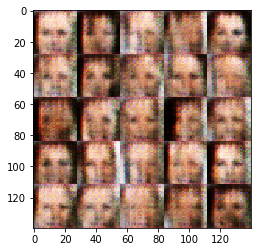

Epoch 1/1... Discriminator Loss: 1.1192... Generator Loss: 1.2417
Epoch 1/1... Discriminator Loss: 1.9859... Generator Loss: 0.2256
Epoch 1/1... Discriminator Loss: 0.8624... Generator Loss: 2.6627
Epoch 1/1... Discriminator Loss: 0.5717... Generator Loss: 1.4870
Epoch 1/1... Discriminator Loss: 0.9971... Generator Loss: 0.9052
Epoch 1/1... Discriminator Loss: 0.9145... Generator Loss: 1.0551
Epoch 1/1... Discriminator Loss: 0.7968... Generator Loss: 2.4883
Epoch 1/1... Discriminator Loss: 0.9415... Generator Loss: 1.9468
Epoch 1/1... Discriminator Loss: 1.6179... Generator Loss: 0.5318
Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 1.3424


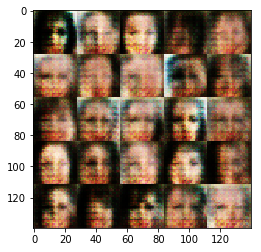

Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.1052... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 1.0718... Generator Loss: 1.1841
Epoch 1/1... Discriminator Loss: 0.6750... Generator Loss: 1.6675
Epoch 1/1... Discriminator Loss: 0.3950... Generator Loss: 1.7596
Epoch 1/1... Discriminator Loss: 0.9551... Generator Loss: 2.1594
Epoch 1/1... Discriminator Loss: 1.0481... Generator Loss: 1.3958
Epoch 1/1... Discriminator Loss: 0.9345... Generator Loss: 3.3534
Epoch 1/1... Discriminator Loss: 1.7159... Generator Loss: 0.3554
Epoch 1/1... Discriminator Loss: 1.6651... Generator Loss: 0.4593


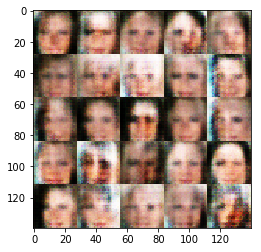

Epoch 1/1... Discriminator Loss: 0.7619... Generator Loss: 1.3830
Epoch 1/1... Discriminator Loss: 0.7056... Generator Loss: 1.5302
Epoch 1/1... Discriminator Loss: 1.0158... Generator Loss: 1.3599
Epoch 1/1... Discriminator Loss: 1.1759... Generator Loss: 0.8082
Epoch 1/1... Discriminator Loss: 1.0353... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 1.3735
Epoch 1/1... Discriminator Loss: 0.6905... Generator Loss: 1.9259
Epoch 1/1... Discriminator Loss: 0.8227... Generator Loss: 1.0565
Epoch 1/1... Discriminator Loss: 1.9023... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 1.3173


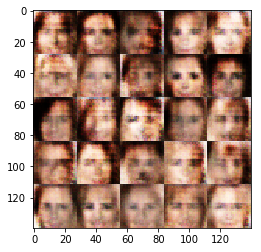

Epoch 1/1... Discriminator Loss: 0.8515... Generator Loss: 1.3878
Epoch 1/1... Discriminator Loss: 0.7181... Generator Loss: 2.4506
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.6277... Generator Loss: 0.7597
Epoch 1/1... Discriminator Loss: 0.8138... Generator Loss: 2.2114
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 3.1752
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 2.4468
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 2.0699
Epoch 1/1... Discriminator Loss: 2.1298... Generator Loss: 0.2368
Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 0.8081


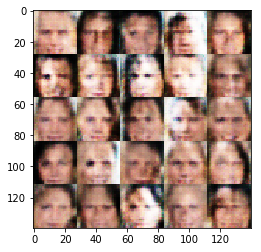

Epoch 1/1... Discriminator Loss: 1.1825... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 0.7707... Generator Loss: 1.5567
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 0.9120
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 1.8457
Epoch 1/1... Discriminator Loss: 1.1814... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 1.6765
Epoch 1/1... Discriminator Loss: 0.8573... Generator Loss: 1.5162
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.8038


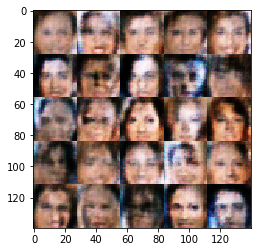

Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.7046
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 1.0063... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 1.8703
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.8008
Epoch 1/1... Discriminator Loss: 1.1177... Generator Loss: 0.9971
Epoch 1/1... Discriminator Loss: 1.6526... Generator Loss: 0.4494


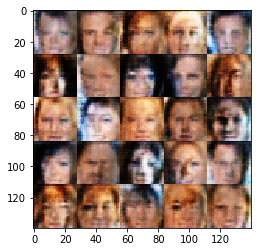

Epoch 1/1... Discriminator Loss: 0.8298... Generator Loss: 1.1499
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.1028
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.9273
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 1.5137
Epoch 1/1... Discriminator Loss: 1.0407... Generator Loss: 1.0498
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 0.8385... Generator Loss: 1.3795
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 1.1633


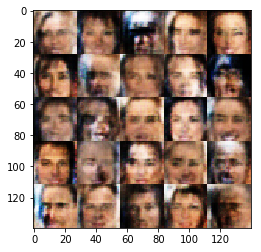

Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 1.7337
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 1.1552... Generator Loss: 0.8730
Epoch 1/1... Discriminator Loss: 1.2721... Generator Loss: 0.8062
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.6554
Epoch 1/1... Discriminator Loss: 1.0804... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 0.9838... Generator Loss: 1.2653
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.8496


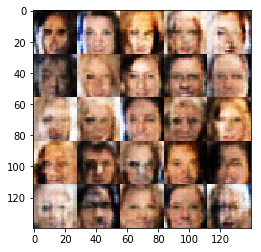

Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 1.7798
Epoch 1/1... Discriminator Loss: 1.0969... Generator Loss: 1.1169
Epoch 1/1... Discriminator Loss: 0.8467... Generator Loss: 1.1153
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.0668... Generator Loss: 1.1819
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 2.6426
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.7517


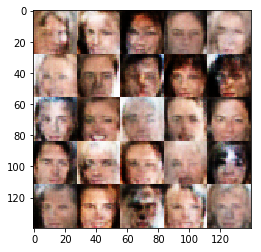

Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 1.6326
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.9153
Epoch 1/1... Discriminator Loss: 1.7039... Generator Loss: 0.6327
Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 1.3722
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.2981
Epoch 1/1... Discriminator Loss: 1.4496... Generator Loss: 0.5052
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.3025
Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 1.2709
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.6884
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 1.1513


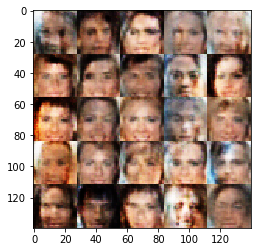

Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 0.9649... Generator Loss: 0.9048
Epoch 1/1... Discriminator Loss: 0.9375... Generator Loss: 1.2100
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.9894
Epoch 1/1... Discriminator Loss: 2.0086... Generator Loss: 0.3070
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.9232
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.3075
Epoch 1/1... Discriminator Loss: 1.8648... Generator Loss: 0.2797


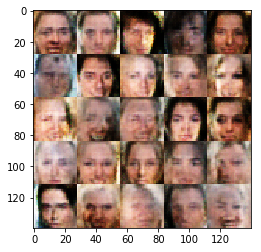

Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.1300
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 0.8965... Generator Loss: 1.5617
Epoch 1/1... Discriminator Loss: 1.1205... Generator Loss: 1.7376
Epoch 1/1... Discriminator Loss: 0.7875... Generator Loss: 0.9710
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 1.5027
Epoch 1/1... Discriminator Loss: 1.1135... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.5850... Generator Loss: 0.4988
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 1.1436
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 1.3532


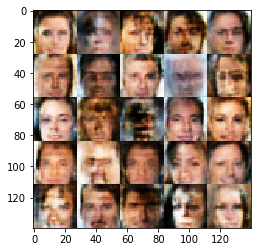

Epoch 1/1... Discriminator Loss: 1.5607... Generator Loss: 0.4497
Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 1.1865
Epoch 1/1... Discriminator Loss: 1.5838... Generator Loss: 0.6481
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.8655
Epoch 1/1... Discriminator Loss: 1.1502... Generator Loss: 1.1816
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.4966... Generator Loss: 0.4736
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 0.8112


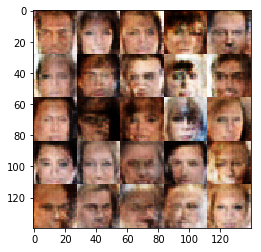

Epoch 1/1... Discriminator Loss: 0.9603... Generator Loss: 0.9112
Epoch 1/1... Discriminator Loss: 1.6350... Generator Loss: 0.4845
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.3468... Generator Loss: 0.4507
Epoch 1/1... Discriminator Loss: 1.6053... Generator Loss: 0.5670
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 1.3294
Epoch 1/1... Discriminator Loss: 0.7973... Generator Loss: 1.0789
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 0.7943... Generator Loss: 1.3485


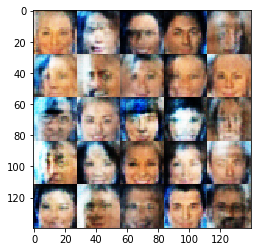

Epoch 1/1... Discriminator Loss: 0.8931... Generator Loss: 1.0972
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.8425
Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.3560
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 2.6852
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 0.7178... Generator Loss: 1.1300
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 1.0918
Epoch 1/1... Discriminator Loss: 0.9527... Generator Loss: 1.4892
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 2.0835


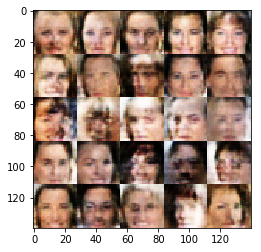

Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 1.6889
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.2308
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 0.9690... Generator Loss: 1.3407
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.4893
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 1.0113
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 1.2672


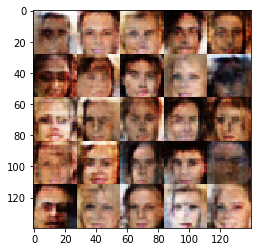

Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 2.0632
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.3491
Epoch 1/1... Discriminator Loss: 1.6593... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.1064... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.8989... Generator Loss: 3.9277
Epoch 1/1... Discriminator Loss: 0.7761... Generator Loss: 1.5725
Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.1038... Generator Loss: 1.6831
Epoch 1/1... Discriminator Loss: 0.8115... Generator Loss: 2.1768


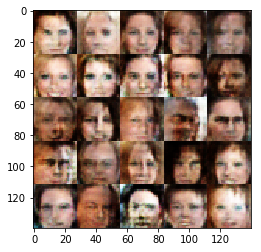

Epoch 1/1... Discriminator Loss: 0.5982... Generator Loss: 1.2154
Epoch 1/1... Discriminator Loss: 0.8076... Generator Loss: 1.3952
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 0.5859... Generator Loss: 1.5111
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 1.0080
Epoch 1/1... Discriminator Loss: 1.0669... Generator Loss: 0.9101
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 1.6738
Epoch 1/1... Discriminator Loss: 0.7787... Generator Loss: 1.5200
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.3858
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.5872


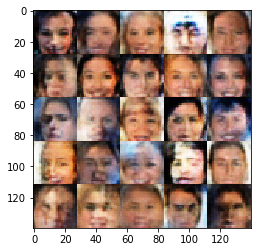

Epoch 1/1... Discriminator Loss: 0.8948... Generator Loss: 1.0052
Epoch 1/1... Discriminator Loss: 0.7289... Generator Loss: 0.9704
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 1.4463
Epoch 1/1... Discriminator Loss: 1.7159... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 0.6526... Generator Loss: 2.6819
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 1.3419
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.7210
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 1.0385
Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 1.0519
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 0.9910


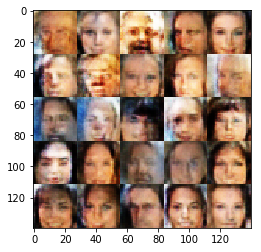

Epoch 1/1... Discriminator Loss: 0.7433... Generator Loss: 1.6152
Epoch 1/1... Discriminator Loss: 1.1029... Generator Loss: 1.5422
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.0618... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 2.0779... Generator Loss: 0.3354
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.3943
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.1267
Epoch 1/1... Discriminator Loss: 1.6435... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 2.8613
Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 1.2280


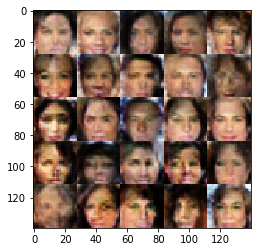

Epoch 1/1... Discriminator Loss: 0.9169... Generator Loss: 1.5946
Epoch 1/1... Discriminator Loss: 0.9407... Generator Loss: 1.5158
Epoch 1/1... Discriminator Loss: 1.1120... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.5280... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 1.6477
Epoch 1/1... Discriminator Loss: 1.6333... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 1.0180... Generator Loss: 1.4231
Epoch 1/1... Discriminator Loss: 0.7740... Generator Loss: 1.1162
Epoch 1/1... Discriminator Loss: 0.6754... Generator Loss: 1.3406


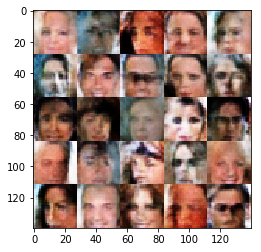

Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 0.5174
Epoch 1/1... Discriminator Loss: 0.8172... Generator Loss: 1.3141
Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 0.9113
Epoch 1/1... Discriminator Loss: 0.6759... Generator Loss: 2.2302
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 1.5327
Epoch 1/1... Discriminator Loss: 1.1676... Generator Loss: 1.2326
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.0433
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 1.0682
Epoch 1/1... Discriminator Loss: 1.0464... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 1.0461


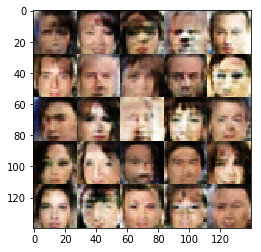

Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 1.0284
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 1.2433
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 2.1197... Generator Loss: 0.4221
Epoch 1/1... Discriminator Loss: 0.5615... Generator Loss: 1.8968
Epoch 1/1... Discriminator Loss: 1.9631... Generator Loss: 0.3814
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 0.8343... Generator Loss: 1.5209
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.0725... Generator Loss: 0.5964


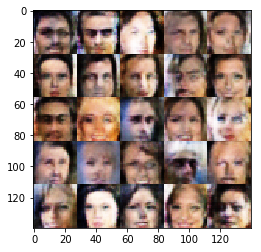

Epoch 1/1... Discriminator Loss: 0.9373... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 0.7161... Generator Loss: 1.2782
Epoch 1/1... Discriminator Loss: 0.8605... Generator Loss: 1.7169
Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 0.9786
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.3725
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.7838
Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 1.0484
Epoch 1/1... Discriminator Loss: 1.1480... Generator Loss: 1.0613


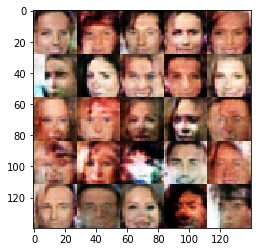

Epoch 1/1... Discriminator Loss: 0.6204... Generator Loss: 1.7056
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 1.1653
Epoch 1/1... Discriminator Loss: 1.5479... Generator Loss: 1.1884
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 1.4780
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.8324
Epoch 1/1... Discriminator Loss: 0.8130... Generator Loss: 1.9147
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 1.0255
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.4103
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 2.1152... Generator Loss: 0.3495


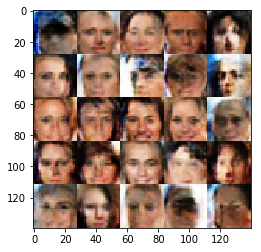

Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.1834
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 0.5047
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 3.4688
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 0.9492... Generator Loss: 2.1408
Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.1147
Epoch 1/1... Discriminator Loss: 0.9037... Generator Loss: 1.4816
Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 1.4373
Epoch 1/1... Discriminator Loss: 1.0897... Generator Loss: 1.1811


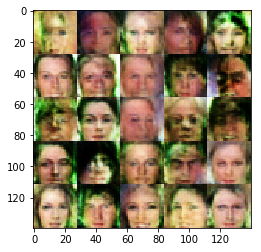

Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 1.7916
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.4936
Epoch 1/1... Discriminator Loss: 0.9801... Generator Loss: 1.8420
Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 0.8675
Epoch 1/1... Discriminator Loss: 0.7661... Generator Loss: 1.7926
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.1998
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.8878
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 1.2469


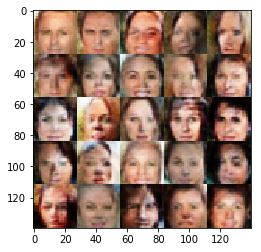

Epoch 1/1... Discriminator Loss: 0.7033... Generator Loss: 1.4086
Epoch 1/1... Discriminator Loss: 0.6765... Generator Loss: 1.8311
Epoch 1/1... Discriminator Loss: 1.5445... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 1.3981
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 1.9459
Epoch 1/1... Discriminator Loss: 0.9817... Generator Loss: 0.8283
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 0.5407... Generator Loss: 2.0964
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 1.0513


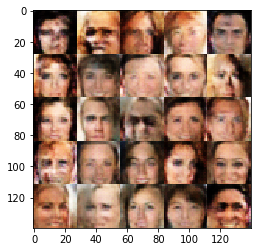

Epoch 1/1... Discriminator Loss: 1.6978... Generator Loss: 0.3804
Epoch 1/1... Discriminator Loss: 0.8296... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 0.6864... Generator Loss: 1.8475
Epoch 1/1... Discriminator Loss: 0.7200... Generator Loss: 1.2182
Epoch 1/1... Discriminator Loss: 0.7380... Generator Loss: 1.1464
Epoch 1/1... Discriminator Loss: 0.7204... Generator Loss: 1.7647
Epoch 1/1... Discriminator Loss: 0.9269... Generator Loss: 3.0765
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 1.9407
Epoch 1/1... Discriminator Loss: 1.4686... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 2.0802... Generator Loss: 0.4461


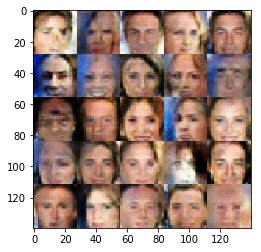

Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 1.8415
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 0.7750... Generator Loss: 1.6555
Epoch 1/1... Discriminator Loss: 0.7618... Generator Loss: 1.4272
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 1.6522
Epoch 1/1... Discriminator Loss: 1.5270... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 1.2063
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 1.2137


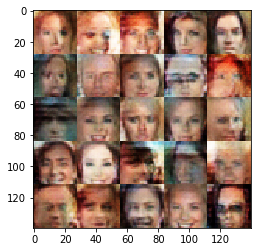

Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 1.1273
Epoch 1/1... Discriminator Loss: 0.9434... Generator Loss: 2.0354
Epoch 1/1... Discriminator Loss: 0.9025... Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 0.9593
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 1.1325
Epoch 1/1... Discriminator Loss: 0.7115... Generator Loss: 0.8391
Epoch 1/1... Discriminator Loss: 1.5472... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 0.7391... Generator Loss: 1.3738
Epoch 1/1... Discriminator Loss: 0.7325... Generator Loss: 1.8709
Epoch 1/1... Discriminator Loss: 0.9339... Generator Loss: 1.4353


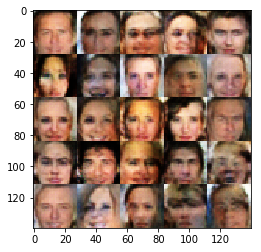

Epoch 1/1... Discriminator Loss: 1.5966... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 0.7830... Generator Loss: 1.3926
Epoch 1/1... Discriminator Loss: 0.6016... Generator Loss: 1.2939
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 1.0354
Epoch 1/1... Discriminator Loss: 1.2273... Generator Loss: 1.5936
Epoch 1/1... Discriminator Loss: 1.1571... Generator Loss: 0.8838
Epoch 1/1... Discriminator Loss: 0.7353... Generator Loss: 1.5092
Epoch 1/1... Discriminator Loss: 1.7652... Generator Loss: 0.5256
Epoch 1/1... Discriminator Loss: 0.9741... Generator Loss: 1.1133
Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 1.3465


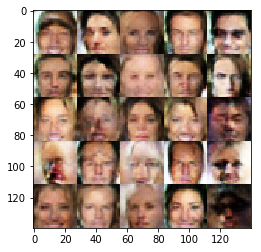

Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.6899
Epoch 1/1... Discriminator Loss: 0.9956... Generator Loss: 0.9061
Epoch 1/1... Discriminator Loss: 1.1698... Generator Loss: 0.5208
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 0.8313
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 0.8248
Epoch 1/1... Discriminator Loss: 0.5226... Generator Loss: 1.8782
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.5384
Epoch 1/1... Discriminator Loss: 0.7850... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 0.7066... Generator Loss: 2.1830


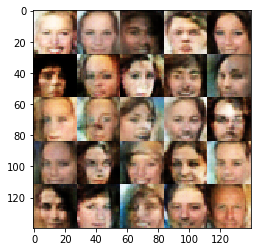

Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 1.9580... Generator Loss: 0.3200
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.6079
Epoch 1/1... Discriminator Loss: 0.7508... Generator Loss: 2.0839
Epoch 1/1... Discriminator Loss: 0.7960... Generator Loss: 1.5252
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 1.1080
Epoch 1/1... Discriminator Loss: 0.9816... Generator Loss: 1.8257
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 0.9811... Generator Loss: 1.5829


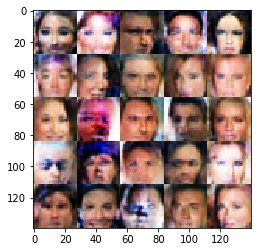

Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 1.4375
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 1.4517
Epoch 1/1... Discriminator Loss: 1.6629... Generator Loss: 0.4587
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 0.9493
Epoch 1/1... Discriminator Loss: 1.3156... Generator Loss: 1.0945
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 0.7682
Epoch 1/1... Discriminator Loss: 1.2205... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 0.8687... Generator Loss: 1.3112
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 1.2121


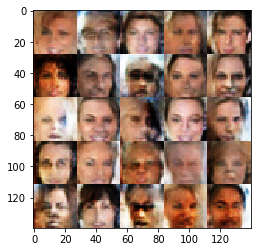

Epoch 1/1... Discriminator Loss: 0.8867... Generator Loss: 1.2610
Epoch 1/1... Discriminator Loss: 0.5006... Generator Loss: 2.5255
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 1.2532
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.5026
Epoch 1/1... Discriminator Loss: 0.8127... Generator Loss: 0.9620
Epoch 1/1... Discriminator Loss: 0.7746... Generator Loss: 1.8583
Epoch 1/1... Discriminator Loss: 1.6249... Generator Loss: 0.3946
Epoch 1/1... Discriminator Loss: 2.3622... Generator Loss: 0.4071
Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 1.3729


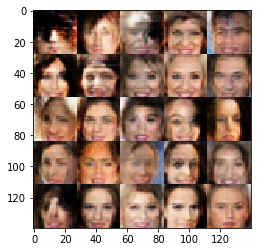

Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 1.2328
Epoch 1/1... Discriminator Loss: 0.7473... Generator Loss: 1.6388
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 0.3391
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.9431
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 1.7287
Epoch 1/1... Discriminator Loss: 0.7776... Generator Loss: 1.4799
Epoch 1/1... Discriminator Loss: 0.7116... Generator Loss: 1.4611
Epoch 1/1... Discriminator Loss: 1.5344... Generator Loss: 1.0843
Epoch 1/1... Discriminator Loss: 1.2051... Generator Loss: 1.0351
Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 2.0488


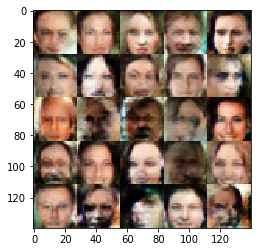

Epoch 1/1... Discriminator Loss: 1.1274... Generator Loss: 1.9287
Epoch 1/1... Discriminator Loss: 1.8655... Generator Loss: 0.4017
Epoch 1/1... Discriminator Loss: 0.5429... Generator Loss: 1.4794
Epoch 1/1... Discriminator Loss: 1.0934... Generator Loss: 1.0881
Epoch 1/1... Discriminator Loss: 1.7211... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.4598... Generator Loss: 0.4361
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 0.8343... Generator Loss: 1.7160


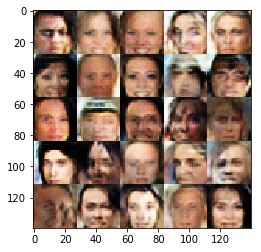

Epoch 1/1... Discriminator Loss: 0.6963... Generator Loss: 1.8778
Epoch 1/1... Discriminator Loss: 1.0784... Generator Loss: 1.1577
Epoch 1/1... Discriminator Loss: 1.5076... Generator Loss: 1.2559
Epoch 1/1... Discriminator Loss: 1.5976... Generator Loss: 0.5713
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.5021
Epoch 1/1... Discriminator Loss: 0.6672... Generator Loss: 1.9732
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 1.1718
Epoch 1/1... Discriminator Loss: 0.6934... Generator Loss: 1.8663
Epoch 1/1... Discriminator Loss: 0.9211... Generator Loss: 1.6526
Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 1.2012


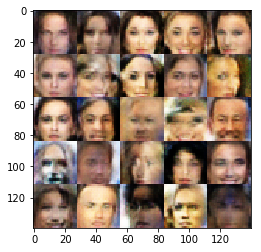

Epoch 1/1... Discriminator Loss: 0.7697... Generator Loss: 1.7956
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 1.1772
Epoch 1/1... Discriminator Loss: 1.2724... Generator Loss: 1.1032
Epoch 1/1... Discriminator Loss: 0.9563... Generator Loss: 1.2095
Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 1.0986
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 1.0431
Epoch 1/1... Discriminator Loss: 0.8192... Generator Loss: 1.2174
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 2.0684
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.1512


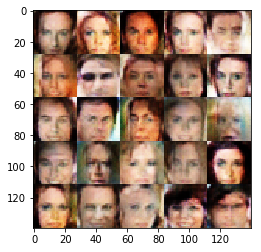

Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 1.1745
Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 1.0148
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 1.6563
Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 2.3589
Epoch 1/1... Discriminator Loss: 1.1454... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.3162
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 1.9457
Epoch 1/1... Discriminator Loss: 2.3266... Generator Loss: 0.3385
Epoch 1/1... Discriminator Loss: 1.5009... Generator Loss: 0.8448


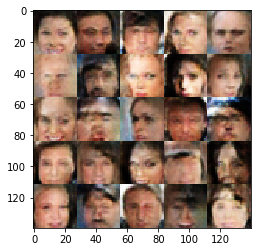

Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.5252
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.5238... Generator Loss: 1.2001
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.5452
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 0.9857... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.3768
Epoch 1/1... Discriminator Loss: 0.9124... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 2.2643


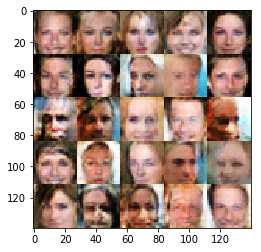

Epoch 1/1... Discriminator Loss: 0.6695... Generator Loss: 1.3569
Epoch 1/1... Discriminator Loss: 0.8693... Generator Loss: 1.1421
Epoch 1/1... Discriminator Loss: 0.6779... Generator Loss: 1.8317
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.4672
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 3.0915
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 0.7230... Generator Loss: 1.9726
Epoch 1/1... Discriminator Loss: 0.5798... Generator Loss: 1.7175
Epoch 1/1... Discriminator Loss: 0.4971... Generator Loss: 1.7779
Epoch 1/1... Discriminator Loss: 0.6065... Generator Loss: 1.9378


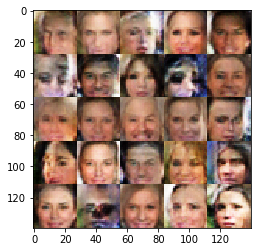

Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 1.8805
Epoch 1/1... Discriminator Loss: 0.6394... Generator Loss: 1.5816
Epoch 1/1... Discriminator Loss: 0.5325... Generator Loss: 1.7053
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 1.8012
Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 1.3420
Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 1.1569
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 1.7850
Epoch 1/1... Discriminator Loss: 2.6094... Generator Loss: 0.2506
Epoch 1/1... Discriminator Loss: 0.8780... Generator Loss: 0.8126


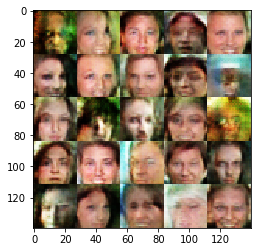

Epoch 1/1... Discriminator Loss: 1.6467... Generator Loss: 0.6700
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 1.1979
Epoch 1/1... Discriminator Loss: 0.5896... Generator Loss: 1.2047
Epoch 1/1... Discriminator Loss: 0.8455... Generator Loss: 1.0155
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 0.6298... Generator Loss: 2.8122
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 1.3527
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.1636... Generator Loss: 1.3224
Epoch 1/1... Discriminator Loss: 0.9662... Generator Loss: 2.1539


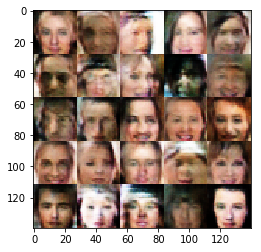

Epoch 1/1... Discriminator Loss: 1.0026... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 0.5191
Epoch 1/1... Discriminator Loss: 0.7245... Generator Loss: 1.5582
Epoch 1/1... Discriminator Loss: 1.0142... Generator Loss: 1.6580
Epoch 1/1... Discriminator Loss: 0.8995... Generator Loss: 1.3298
Epoch 1/1... Discriminator Loss: 0.9307... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.5117... Generator Loss: 0.4772
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 1.1906
Epoch 1/1... Discriminator Loss: 0.6251... Generator Loss: 1.4643
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.8087


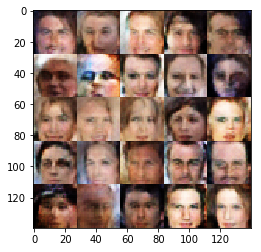

Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 1.7664
Epoch 1/1... Discriminator Loss: 1.9291... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.0495... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 0.9588... Generator Loss: 1.0186
Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.3645
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 1.0116
Epoch 1/1... Discriminator Loss: 1.0036... Generator Loss: 1.4677
Epoch 1/1... Discriminator Loss: 0.9704... Generator Loss: 1.2710
Epoch 1/1... Discriminator Loss: 0.6416... Generator Loss: 2.4828


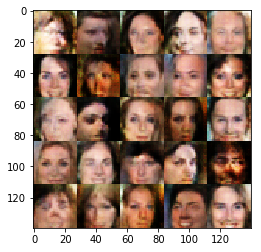

Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 1.0976
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 1.2553
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 1.1410
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 1.3856
Epoch 1/1... Discriminator Loss: 0.6006... Generator Loss: 1.9298
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 1.0865
Epoch 1/1... Discriminator Loss: 0.9750... Generator Loss: 0.9712
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 1.3225


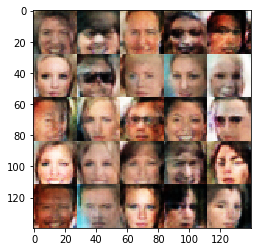

Epoch 1/1... Discriminator Loss: 0.6833... Generator Loss: 1.5606
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 0.9027... Generator Loss: 0.9522
Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 0.6697... Generator Loss: 1.3663
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 1.2976
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.1532
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 1.6834
Epoch 1/1... Discriminator Loss: 0.9691... Generator Loss: 1.4840
Epoch 1/1... Discriminator Loss: 0.6743... Generator Loss: 0.8356


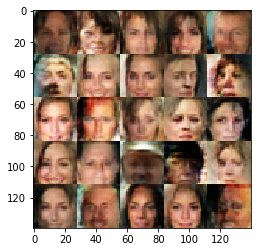

Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.4710
Epoch 1/1... Discriminator Loss: 0.9480... Generator Loss: 1.0415
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 1.1889
Epoch 1/1... Discriminator Loss: 0.9640... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 1.2024... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 0.6637... Generator Loss: 1.6967
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 1.6882
Epoch 1/1... Discriminator Loss: 1.0868... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 2.0850


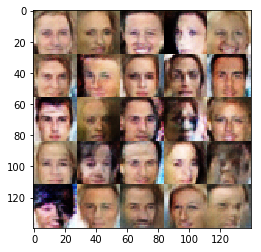

Epoch 1/1... Discriminator Loss: 1.8166... Generator Loss: 0.5308
Epoch 1/1... Discriminator Loss: 0.5276... Generator Loss: 1.6054
Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 0.7834... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 0.7039... Generator Loss: 1.1438
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 1.0129
Epoch 1/1... Discriminator Loss: 0.9974... Generator Loss: 1.6141
Epoch 1/1... Discriminator Loss: 1.1254... Generator Loss: 1.1099
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 1.1132


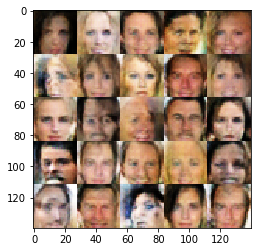

Epoch 1/1... Discriminator Loss: 1.1740... Generator Loss: 1.0741
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.7913
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 1.1444
Epoch 1/1... Discriminator Loss: 1.8530... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 2.5966
Epoch 1/1... Discriminator Loss: 1.5244... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 0.9529... Generator Loss: 1.3151
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.4210
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 2.1919
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 0.9524


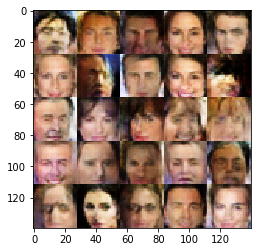

Epoch 1/1... Discriminator Loss: 1.0537... Generator Loss: 1.2258
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 1.6096
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 0.7054... Generator Loss: 1.6655
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 2.1116
Epoch 1/1... Discriminator Loss: 2.3447... Generator Loss: 0.2426
Epoch 1/1... Discriminator Loss: 0.9648... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 0.8744... Generator Loss: 1.2920
Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 1.9191
Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 0.7972


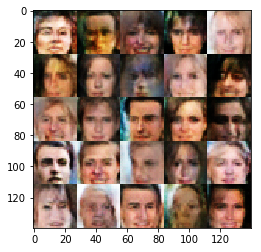

Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 1.3891
Epoch 1/1... Discriminator Loss: 2.1266... Generator Loss: 0.5682
Epoch 1/1... Discriminator Loss: 0.8836... Generator Loss: 1.5684
Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 1.7825
Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 0.7597
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 1.5217
Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 2.9552
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 2.1929
Epoch 1/1... Discriminator Loss: 1.0725... Generator Loss: 1.0524


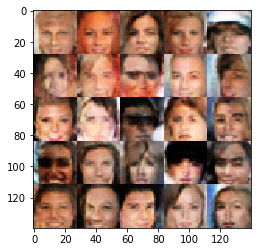

Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 1.4241
Epoch 1/1... Discriminator Loss: 1.6518... Generator Loss: 0.4756
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.8797
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.8635
Epoch 1/1... Discriminator Loss: 0.7889... Generator Loss: 1.3331
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 1.2946
Epoch 1/1... Discriminator Loss: 1.0295... Generator Loss: 1.5915
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 1.0723


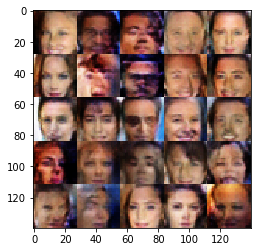

Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 1.2250
Epoch 1/1... Discriminator Loss: 1.1081... Generator Loss: 1.1612
Epoch 1/1... Discriminator Loss: 0.5534... Generator Loss: 1.5042
Epoch 1/1... Discriminator Loss: 0.5760... Generator Loss: 1.8327
Epoch 1/1... Discriminator Loss: 1.0343... Generator Loss: 1.4211
Epoch 1/1... Discriminator Loss: 1.0791... Generator Loss: 1.5650
Epoch 1/1... Discriminator Loss: 0.6874... Generator Loss: 2.0104
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 1.0621
Epoch 1/1... Discriminator Loss: 0.9142... Generator Loss: 1.7617
Epoch 1/1... Discriminator Loss: 0.8003... Generator Loss: 1.0652


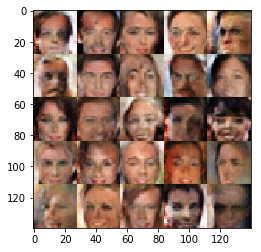

Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 1.1688
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.7492
Epoch 1/1... Discriminator Loss: 0.9139... Generator Loss: 1.3247
Epoch 1/1... Discriminator Loss: 0.2118... Generator Loss: 2.1053
Epoch 1/1... Discriminator Loss: 2.1493... Generator Loss: 0.3096
Epoch 1/1... Discriminator Loss: 1.7851... Generator Loss: 0.5570
Epoch 1/1... Discriminator Loss: 0.7593... Generator Loss: 1.8338
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 0.9673


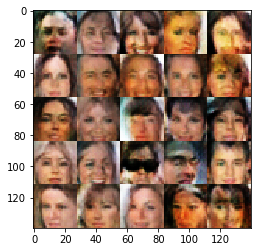

Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7164
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.6268
Epoch 1/1... Discriminator Loss: 2.0335... Generator Loss: 0.3497
Epoch 1/1... Discriminator Loss: 2.2222... Generator Loss: 0.4069
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 0.9015... Generator Loss: 1.3265
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 1.7857... Generator Loss: 1.3930
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 1.1557
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 1.2289


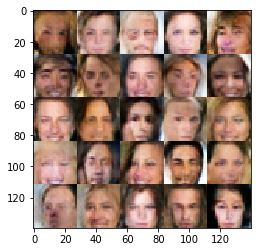

Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 0.6502... Generator Loss: 1.3122
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 2.8854
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 0.7132... Generator Loss: 1.7575
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 0.9820
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 0.9719
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 2.0004
Epoch 1/1... Discriminator Loss: 1.0336... Generator Loss: 0.7393


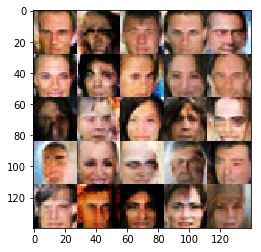

Epoch 1/1... Discriminator Loss: 0.7337... Generator Loss: 1.5754
Epoch 1/1... Discriminator Loss: 1.5638... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 0.8005... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 2.4847
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.4685
Epoch 1/1... Discriminator Loss: 0.9812... Generator Loss: 1.1246
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 1.3042
Epoch 1/1... Discriminator Loss: 1.2045... Generator Loss: 0.8915
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 1.1381
Epoch 1/1... Discriminator Loss: 0.9368... Generator Loss: 1.1459


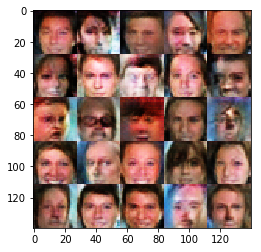

Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.9062
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 1.2001
Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 1.3729


In [20]:
# batch_size = None
# z_dim = None
# learning_rate = None
# beta1 = None
batch_size = 32 #32
z_dim = 200 #150
learning_rate = 0.0005
beta1 = 0.2

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

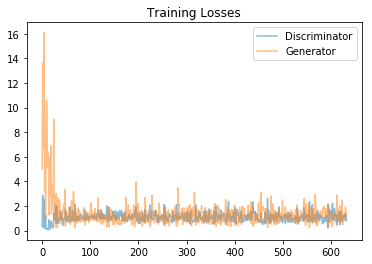

In [21]:
plt = pyplot
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.